In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def crossmoon(N = 100,d = -15,r = 10,w = 2):
    w2 = w/2
    data = np.empty(0)
    while data.shape[0] < N:
        tmp_x = 2*(r+w2)*(np.random.random([N,1])-0.5)
        tmp_y = (r+w2)*np.random.random([N,1])
        tmp = np.concatenate((tmp_x,tmp_y),axis = 1)
        tmp_ds = np.sqrt(tmp_x*tmp_x+tmp_y*tmp_y)
        idx = np.logical_and(tmp_ds>(r-w2),tmp_ds<(r+w2))
        idx = (idx.nonzero())[0]
        if data.shape[0]==0:
            data = tmp.take(idx,axis = 0)
        else:
            data = np. concatenate((data,tmp.take(idx,axis = 0)),axis = 0)
   
    cross_moon = data[0:N,:]
    #生成下半月
    data_t = np.empty([N,2])
    data_t[:,0]= data[0:N,0]+r
    data_t[:,1] = -data[0:N,1]-d
    cross_moon = np.concatenate((cross_moon,data_t),axis = 0)
    return cross_moon
     

In [24]:
num_example = 2500
x = crossmoon(N = num_example // 2)
print(x)

[[ 9.73056898  4.40125191]
 [-6.1599121   8.20861297]
 [ 2.84614789  9.64821429]
 ...
 [11.21518473  5.82576912]
 [19.0044681  13.97603649]
 [15.06549637  6.63958535]]


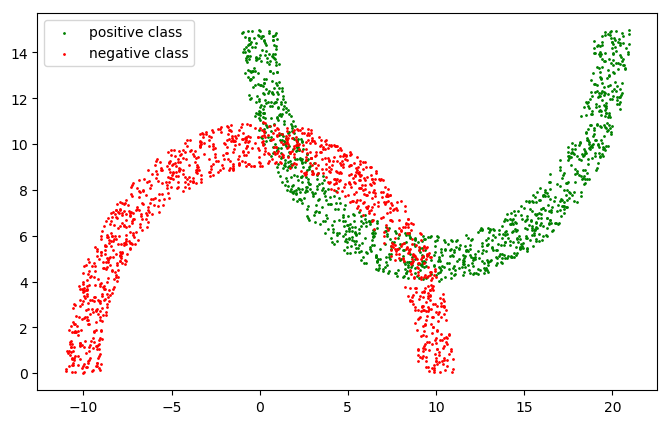

In [25]:

plt.figure(figsize = (8,5),dpi = 100)
plt.scatter(x[num_example // 2:,0],x[num_example //2 :,1],1,color = 'green',label = 'positive class')
plt.legend(loc = 'best')
plt.scatter(x[:num_example // 2,0],x[:num_example //2,1],1,color = 'red',label = 'negative class')
plt.legend(loc = 'best')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 500)

In [27]:
w = np.zeros([2],dtype = np.float32)
b = 0
def rosenblatt(x):
    z = np.sum(w*x)+b
    if z>=0:
        return 1
    else:
        return 0

In [28]:
def mse(label,pred):
    return np.average((np.array(label) - np.array(pred))**2)

In [29]:
train_steps = 10000
summary_step = 50
summary = np.empty([train_steps // summary_step, 2])
lr = 0.1
for i in range(0, train_steps): 
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss]) 
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]   
    out = rosenblatt(one_x) 
    w = w + lr * (one_y - out) * one_x
    b = b + lr * (one_y - out)

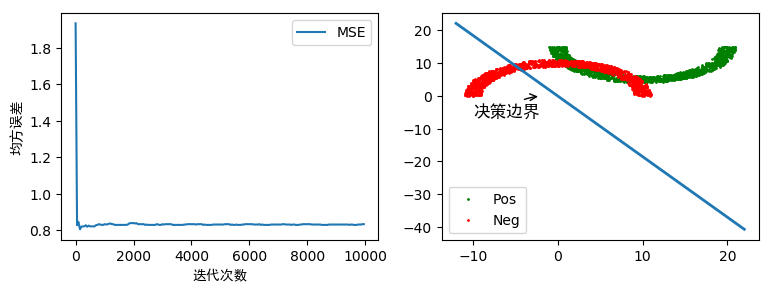

In [30]:
plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.plot(summary[:, 0], summary[:, 1], label='MSE')
plt.legend(loc='best')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('均方误差', fontproperties='SimHei')

plt.subplot(1, 2, 2)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Pos')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Neg')
plt.legend(loc='best')
left_coord_y = (-b - (-12) * w[0]) / w[1]
right_coord_y = (-b - (22) * w[0]) / w[1]
plt.plot([-12, 22], [left_coord_y, right_coord_y], linewidth=2)

plt.annotate(
    '决策边界', xy=(-2, -0.2), xytext=(-10., -6.5), 
     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), 
     fontproperties='SimHei', fontsize=12)

plt.show()